In [1]:
import pandas as pd
import requests
import selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
from selenium.common.exceptions import NoSuchElementException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import ElementNotInteractableException
from selenium.common.exceptions import SessionNotCreatedException
from selenium.common.exceptions import TimeoutException

In [10]:
driver=webdriver.Chrome(r"C:\Users\rudra\Downloads\chromedriver_win32\chromedriver.exe")
driver.get("https://www.amazon.in/")

In [12]:
user_input=input('Enter the Product-')

Enter the Product-Laptop


In [13]:
laptop=driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[2]/div[1]/input')
laptop.send_keys(user_input)

In [14]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/header/div/div[1]/div[2]/div/form/div[3]/div/span/input')
search.click()

In [15]:
lap=[]
start=0
end=3
for page in range(start,end):

    url=driver.find_elements(By.XPATH,'//a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
    for i in url:
        lap.append(i.get_attribute('href'))
    next_button=driver.find_elements(By.XPATH,'/html/body/div[1]/div[2]/div[1]/div[1]/div/span[1]/div[1]/div[30]/div/div/span/a[3]')    

In [17]:
Brand_Name=[]
Name_of_Product=[]
Price=[]
Return_Exchange=[]
Expected_Delivery=[]
Availability=[]

In [19]:

for i in lap:
    driver.get(i)
    time.sleep(1)
    try:
        brand=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[4]/div[4]/div[44]/div/div[1]/div/table/tbody/tr[1]/td[2]/span')
        Brand_Name.append(brand.text)
    except NoSuchElementException:
        Brand_Name.append('-')

In [20]:
for i in lap:
    driver.get(i)
    time.sleep(1)
    try:
        brand=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[4]/div[4]/div[1]/div/h1/span')
        Name_of_Product.append(brand.text)
    except NoSuchElementException:
        Name_of_Product.append('-')

   

In [21]:
for i in lap:
    driver.get(i)
    time.sleep(1)
    try:
        brand=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[4]/div[4]/div[10]/div[3]/div[1]/span[2]/span[2]/span[2]')
        Price.append(brand.text)
    except NoSuchElementException:
        Price.append('-')

  
       

In [22]:
for i in lap:
    driver.get(i)
    time.sleep(1)
    try:
        brand=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[4]/div[1]/div[3]/div/div[1]/div/div[1]/div/div/div[1]/div/div[1]/h5/div[1]/span/span')
        Return_Exchange.append(brand.text)
    except NoSuchElementException:
        Return_Exchange.append('-')



In [23]:
for i in lap:
    driver.get(i)
    time.sleep(1)
    try:
        brand=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[4]/div[1]/div[3]/div/div[1]/div/div[1]/div/div/div[2]/div/div[2]/div/form/div/div/div[2]/div[8]/div[1]/div')
        Expected_Delivery.append(brand.text)
    except NoSuchElementException:
        Expected_Delivery.append('-')
        

In [24]:
for i in lap:
    driver.get(i)
    time.sleep(1)
    try:
        brand=driver.find_element(By.XPATH,'/html/body/div[2]/div[2]/div[5]/div[4]/div[1]/div[3]/div/div[1]/div/div[1]/div/div/div[2]/div/div[2]/div/form/div/div/div[4]/div/div[1]')
        Availability.append(brand.text)
    except NoSuchElementException:
        Availability.append('-')


In [25]:
len(Brand_Name),len(Availability),len(Expected_Delivery),len(Return_Exchange),len(Price),len(Name_of_Product)


(93, 93, 93, 93, 93, 93)

In [26]:
df=pd.DataFrame({'Brand Name':Brand_Name,'Name of the Product':Name_of_Product,'Price':Price,'Return/Exchange':Return_Exchange,'Expected Delivery':Expected_Delivery,'Availability':Availability})
df

,Brand Name,Name of the Product,Price,Return/Exchange,Expected Delivery,Availability
0,-,"HP Chromebook 11a, MediaTek MT8183 Processor 1...",-,With Exchange,"FREE delivery Wednesday, 1 February. Details\n...",In stock.
1,LG,LG Gram16 Intel EVO-[12th Gen Core i7/Win11/16...,"1,11,999",With Exchange,"FREE delivery Wednesday, 1 February. Details\n...",In stock.
2,-,(Renewed) Dell Latitude E5470 Intel Core i5 6t...,-,-,-,-
3,-,-,-,With Exchange,"FREE delivery Wednesday, 1 February. Details\n...",In stock.
4,-,-,-,With Exchange,"FREE delivery Wednesday, 1 February. Details\n...",In stock.
...,...,...,...,...,...,...
88,-,"HP ProBook 440 G8 Notebook PC, 11th Gen Intel ...",-,With Exchange,"FREE delivery Wednesday, 1 February. Details\n...",In stock.
89,ASUS,"ASUS Vivobook 14, 14.0-inch (35.56 cms) HD, In...",-,With Exchange,"FREE delivery Wednesday, 1 February. Details\n...",In stock.
90,HP,-,"38,490",With Exchange,"FREE delivery Wednesday, 1 February. Details\n...",-
91,Dell,-,"43,490",With Exchange,"FREE delivery Thursday, 2 February. Order with...",Only 2 left in stock.


In [36]:
driver=webdriver.Chrome(r"C:\Users\rudra\Downloads\chromedriver_win32\chromedriver.exe")
driver.get("https://images.google.com/")

In [6]:
fruit=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input')
fruit.send_keys('fruits')

In [7]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button')
search.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
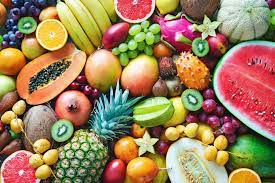
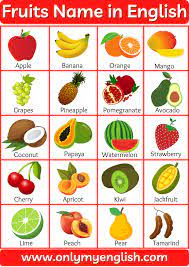
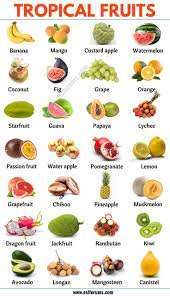
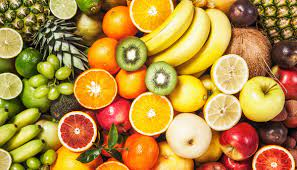
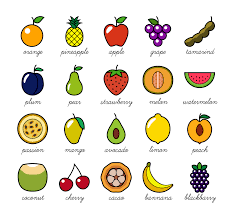
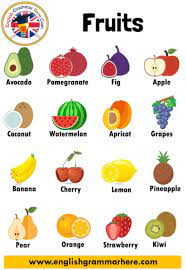
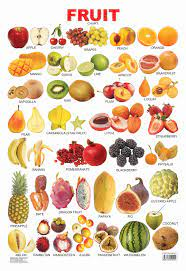
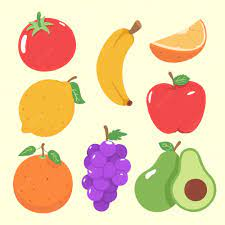
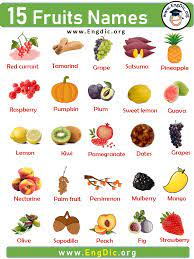
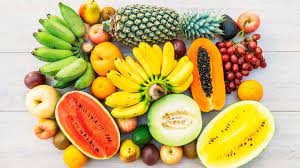

In [18]:
Fruits=[]

images = driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
for i in images[0:10]:
    Fruits.append(i.get_attribute('src'))
Fruits    

In [19]:
driver.back()

In [20]:
fruit=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input')
fruit.send_keys('cars')

In [21]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button')
search.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
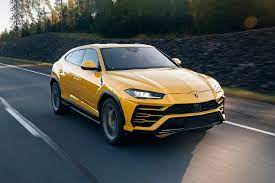
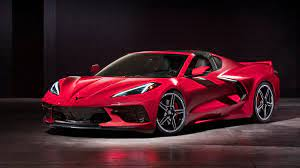
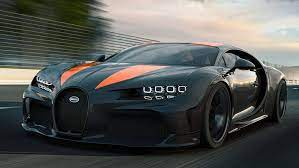
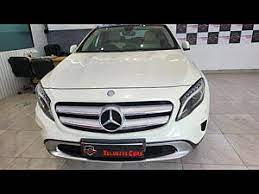
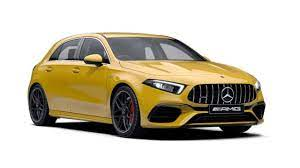
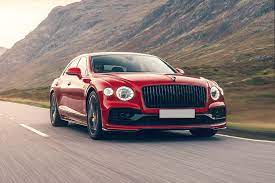
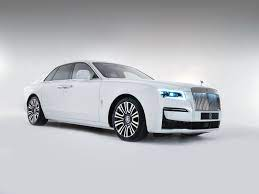
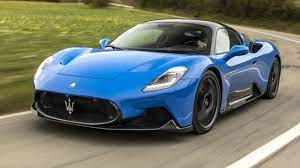
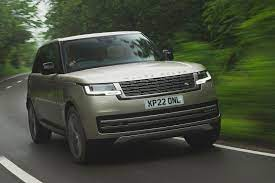
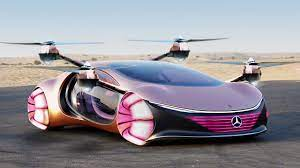

In [22]:
cars=[]

images = driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
for i in images[0:10]:
    cars.append(i.get_attribute('src'))
cars 

In [23]:
driver.back()

In [24]:
fruit=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input')
fruit.send_keys('Machine Learning')

In [25]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button')
search.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
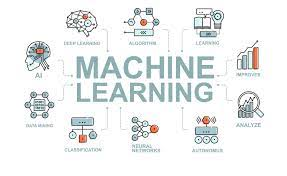
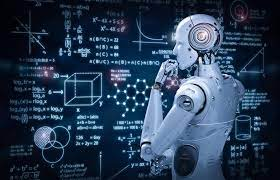
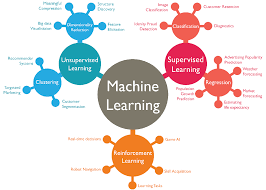
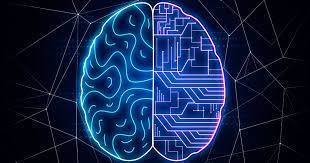
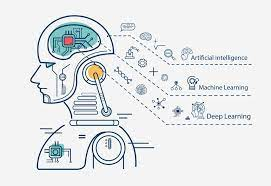
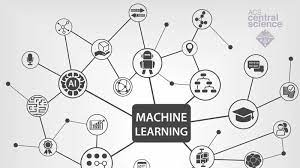
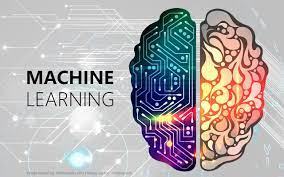
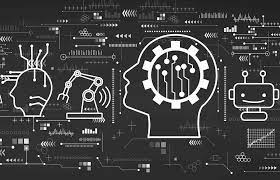
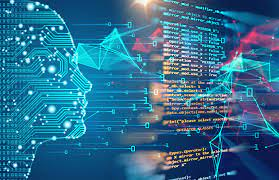
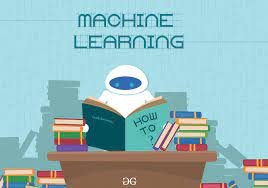

In [26]:
Machine_Learning=[]

images = driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
for i in images[0:10]:
    Machine_Learning.append(i.get_attribute('src'))
Machine_Learning 

In [27]:
driver.back()

In [28]:
fruit=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input')
fruit.send_keys('Guitar')

In [29]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button')
search.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
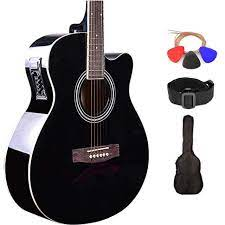
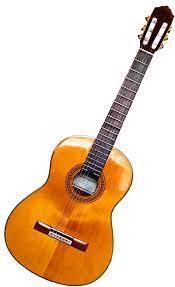
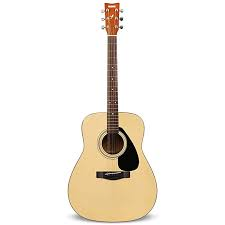
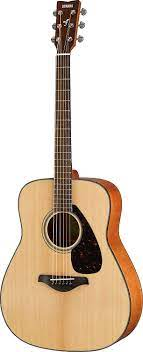
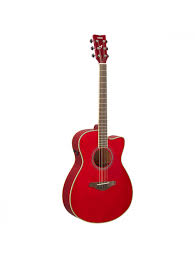
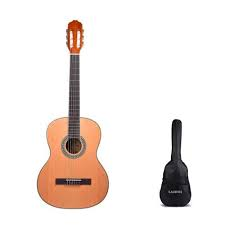
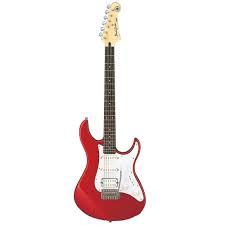
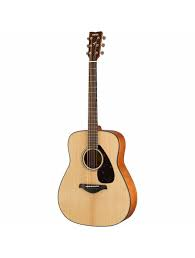
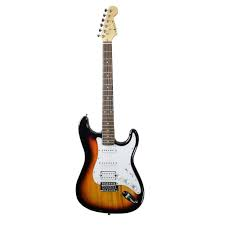
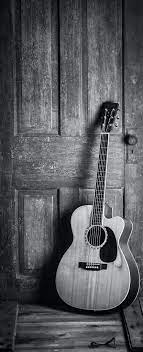

In [30]:
Guitar=[]

images = driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
for i in images[0:10]:
    Guitar.append(i.get_attribute('src'))
Guitar

In [31]:
driver.back()

In [37]:
fruit=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/div/div[2]/input')
fruit.send_keys('Cakes')

In [39]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/div[3]/form/div[1]/div[1]/div[1]/button')
search.click()

['',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '']
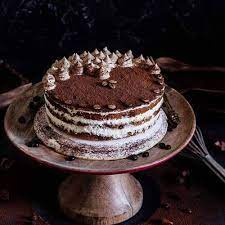
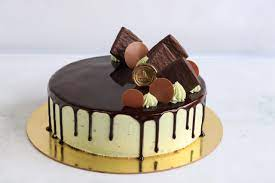
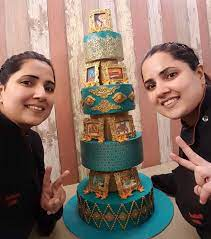
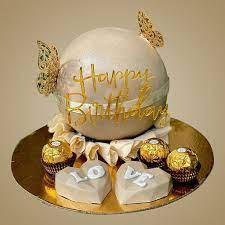
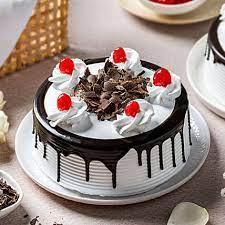
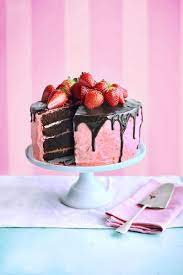
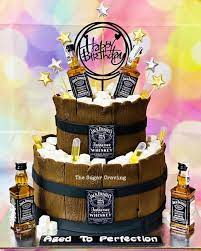
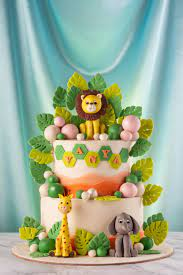
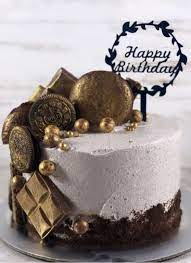
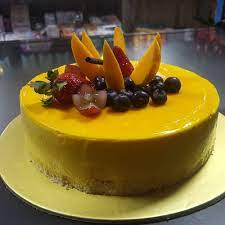

In [40]:
Cakes=[]

images = driver.find_elements(By.XPATH,'//img[@class="rg_i Q4LuWd"]')
for i in images[0:10]:
    Cakes.append(i.get_attribute('src'))
Cakes

In [27]:
driver=webdriver.Chrome(r"C:\Users\rudra\Downloads\chromedriver_win32\chromedriver.exe")
driver.get("https://www.flipkart.com/")

In [28]:
shoes=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/div/input')
shoes.send_keys('Smartphone')

In [29]:
search=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[1]/div[1]/div[2]/div[2]/form/div/button')
search.click()


In [30]:
URL=[]    
url=driver.find_elements(By.XPATH,'//a[@class="_1fQZEK"]')
for i in url:
    URL.append(i.get_attribute('href'))

In [32]:
Brand_Name=[]
Smartphone_Name=[]
Colour=[]
RAM=[]
Storage_ROM1=[]
Primary_Camera=[]
Secondary_Camera=[]
Display_Size=[]
Battery_Capacity=[]
Price=[]
Product_URL=[]

In [56]:

for i in URL:
    driver.get(i)
    time.sleep(5)
    try:
        brand=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[5]/div/div[1]/div/img')
        Brand_Name.append(brand.text)
    except NoSuchElementException:
        Brand_Name.append('-')

In [57]:
for i in URL:
    driver.get(i)
    time.sleep(5)
    try:
        brand=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[2]/div/div[1]/h1/span')
        Smartphone_Name.append(brand.text)
    except NoSuchElementException:
        Smartphone_Name.append('-')

In [58]:
for i in URL:
    driver.get(i)
    time.sleep(5)
    try:
        brand=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[1]/table/tbody/tr[4]/td[2]/ul/li')
        Colour.append(brand.text)
    except NoSuchElementException:
        Colour.append('-')

In [59]:
for i in URL:
    driver.get(i)
    time.sleep(5)
    try:
        brand=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[4]/table/tbody/tr[2]/td[2]/ul/li')
        RAM.append(brand.text)
    except NoSuchElementException:
        RAM.append('-')

In [60]:
for i in URL:
    driver.get(i)
    time.sleep(5)
    try:
        brand=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[8]/div[4]/div/div[2]/div[1]/div[4]/table/tbody/tr[1]/td[2]/ul/li')
        Storage_ROM1.append(brand.text)
    except NoSuchElementException:
        Storage_ROM1.append('-')

In [61]:
for i in URL:
    driver.get(i)
    time.sleep(5)
    try:
        brand=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[5]/table/tbody/tr[2]/td[2]/ul/li')
        Primary_Camera.append(brand.text)
    except NoSuchElementException:
        Primary_Camera.append('-')

In [62]:
for i in URL:
    driver.get(i)
    time.sleep(5)
    try:
        brand=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[9]/div[5]/div/div[2]/div[1]/div[5]/table/tbody/tr[3]/td[2]/ul/li')
        Secondary_Camera.append(brand.text)
    except NoSuchElementException:
        Secondary_Camera.append('-')

In [63]:
for i in URL:
    driver.get(i)
    time.sleep(5)
    try:
        brand=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[8]/div[1]/div/div[2]/ul/li[4]')
        Battery_Capacity.append(brand.text)
    except NoSuchElementException:
        Battery_Capacity.append('-')

In [64]:

for i in URL:
    driver.get(i)
    time.sleep(5)
    try:
        brand=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[8]/div[1]/div/div[2]/ul/li[2]')
        Display_Size.append(brand.text)
    except NoSuchElementException:
        Display_Size.append('-')

In [65]:
for i in URL:
    driver.get(i)
    time.sleep(5)
    try:
        brand=driver.find_element(By.XPATH,'/html/body/div[1]/div/div[3]/div[1]/div[2]/div[2]/div/div[4]/div[1]/div/div[1]')
        Price.append(brand.text)
    except NoSuchElementException:
        Price.append('-')

In [66]:
df=pd.DataFrame({'Brand Name':Brand_Name,'Smartphone Name':Smartphone_Name,'Colour':Colour,'RAM':RAM,'Storage(ROM)':Storage_ROM1,'Primary Camera':Primary_Camera,'Secondary Camera':Secondary_Camera,'Display Size':Display_Size,'Battery Capacity':Battery_Capacity,'Price':Price,'Product URL':URL})
df        

,Brand Name,Smartphone Name,Colour,RAM,Storage(ROM),Primary Camera,Secondary Camera,Display Size,Battery Capacity,Price,Product URL
0,,"APPLE iPhone 14 (Blue, 128 GB)",Blue,-,-,,,15.49 cm (6.1 inch) Super Retina XDR Display,"A15 Bionic Chip, 6 Core Processor Processor","₹65,999",https://www.flipkart.com/apple-iphone-14-blue-...
1,,"MOTOROLA e40 (Carbon Gray, 64 GB) (4 GB RAM)",-,-,-,-,-,16.51 cm (6.5 inch) HD+ Display,5000 mAh Battery,"₹7,999",https://www.flipkart.com/motorola-e40-carbon-g...
2,,"POCO C31 (Shadow Gray, 64 GB) (4 GB RAM)",-,-,,-,-,-,-,"₹7,499",https://www.flipkart.com/poco-c31-shadow-gray-...
3,,"POCO C31 (Shadow Gray, 32 GB) (3 GB RAM)",Shadow Gray,,-,,,16.59 cm (6.53 inch) HD+ Display,5000 mAh Lithium-ion Polymer Battery,"₹6,499",https://www.flipkart.com/poco-c31-shadow-gray-...
4,,"MOTOROLA G62 5G (Midnight Gray, 128 GB) (6 GB...",-,-,-,-,-,16.64 cm (6.55 inch) Full HD+ Display,5000 mAh Lithium Polymer Battery,"₹14,999",https://www.flipkart.com/motorola-g62-5g-midni...
5,,"Infinix HOT 20 Play (Fantasy Purple, 64 GB) (...",-,-,-,-,-,17.32 cm (6.82 inch) HD+ Display,6000 mAh Li-ion Polymer Battery,"₹8,999",https://www.flipkart.com/infinix-hot-20-play-f...
6,,"MOTOROLA G62 5G (Frosted Blue, 128 GB) (6 GB ...",-,-,-,-,-,16.64 cm (6.55 inch) Full HD+ Display,5000 mAh Lithium Polymer Battery,"₹14,999",https://www.flipkart.com/motorola-g62-5g-frost...
7,-,"SAMSUNG Galaxy F23 5G (Forest Green, 128 GB) ...",-,-,-,-,-,-,-,-,https://www.flipkart.com/samsung-galaxy-f23-5g...
8,,-,-,-,-,-,-,17.32 cm (6.82 inch) HD+ Display,6000 mAh Li-ion Polymer Battery,"₹8,999",https://www.flipkart.com/infinix-hot-20-play-a...
9,,"Infinix HOT 20 Play (Racing Black, 64 GB) (4 ...",-,-,-,-,-,17.32 cm (6.82 inch) HD+ Display,6000 mAh Li-ion Polymer Battery,"₹8,999",https://www.flipkart.com/infinix-hot-20-play-r...


In [5]:
driver=webdriver.Chrome(r"C:\Users\rudra\Downloads\chromedriver_win32\chromedriver.exe")
driver.get("https://www.googlemaps.com/")

In [6]:
location=driver.find_element(By.XPATH,'/html/body/div[3]/div[9]/div[3]/div[1]/div[1]/div[1]/div[2]/form/div[2]/div[3]/div/input[1]')
location.send_keys('Kanpur')

In [7]:
search=driver.find_element(By.XPATH,'/html/body/div[3]/div[9]/div[3]/div[1]/div[1]/div[1]/div[2]/div[1]/button')
search.click()

In [17]:
get_url = driver.current_url
print('Latitude,Longitude of City- '+str(get_url.split('/')[6][1:22]))

Latitude,Longitude of City- 26.4471737,80.3383827


In [94]:
driver=webdriver.Chrome(r"C:\Users\rudra\Downloads\chromedriver_win32\chromedriver.exe")
driver.get("https://digit.in/")

In [95]:
gaming=driver.find_element(By.XPATH,'/html/body/div[2]/div/ul/li[3]/a')
gaming.click()

In [96]:
laptop=driver.find_element(By.XPATH,'/html/body/div[2]/div/ul/li[3]/div/div/div[2]/div/ul[2]/li[1]/a')
laptop.click()

In [97]:
Laptop_Name=[]
Windows=[]
Display=[]
Processor=[]
RAM_ROM=[]

In [98]:
title=driver.find_elements(By.XPATH,'//div[@class="left_side"]')
for i in title[0:10]:
    title1=i.text.split('\n')[1]
    Laptop_Name.append(title1)    

In [99]:
title=driver.find_elements(By.XPATH,'//div[@class="product-detail"]')
for i in title[0:10]:
    title1=i.text.split('\n')[0]
    Windows.append(title1)
 

In [100]:
title=driver.find_elements(By.XPATH,'//div[@class="product-detail"]')
for i in title[0:10]:
    title1=i.text.split('\n')[1]
    Display.append(title1)

In [101]:
title=driver.find_elements(By.XPATH,'//div[@class="product-detail"]')
for i in title[0:10]:
    title1=i.text.split('\n')[2]
    Processor.append(title1)


In [102]:
title=driver.find_elements(By.XPATH,'//div[@class="product-detail"]')
for i in title[0:10]:
    title1=i.text.split('\n')[3]
    RAM_ROM.append(title1)


In [103]:
df=pd.DataFrame({'Name':Laptop_Name,'Windows':Windows,'Display':Display,'Processor':Processor,'RAM/ROM':RAM_ROM})
df

,Name,Windows,Display,Processor,RAM/ROM
0,MSI Titan GT77-12UHS,Windows 11 Home OS,"17.3"" (3840 x 2160) Display",12th Gen Intel Core i9-12900HX | NA Processor,2 TB SSD/64 GB DDR5 Memory
1,Alienware X17 R2,Windows 11 Home OS,"17.3"" (1920 x 1080) Display",12th Gen Intel Core i9-12900H | 5 GHz Processor,1 TB SSD/32 GB DDR5 Memory
2,Acer Predator Triton 500 SE PT516-52s,Windows 11 OS,"16"" (2560 x 1600) Display",12th Gen Intel Core i7-12700H | 3.5 GHz Processor,2 TB SSD/32 GB DDR5 Memory
3,Omen By HP (16-B1371TX),Windows 11 Home OS,"16.1"" (2560 x 1440) Display",12th Gen Intel Core i7-12700H | 4.7 GHz Processor,1 TB SSD/8 GB DDR5 Memory
4,Acer Predator Helios 300 AN515-45,Windows 11 Home OS,"15.6"" (2560 x 1440) Display",AMD Ryzen 9-5900HX | NA Processor,512 GB SSD/16 GB DDR4 Memory
5,MSI Delta 15 (A5EFK-083IN),Windows 11 Home OS,"15.6"" (1920 x 1080) Display",AMD 5th Gen Ryzen 9-5900HX | 3.3GHz Processor,1 TB SSD/16 GBGB DDR4 Memory
6,Omen By HP (16-C0141AX),Windows 11 Home OS,"16.1"" (2560 x 1440) Display",AMD Ryzen™ 9 5900HX | 3.3 GHz Processor,1 TB NVMe/16 GB DDR4 Memory
7,Lenovo Legion 5i Pro (82RF00MGIN),Windows 11 Home OS,"16"" (2560 x 1600) Display",12th Gen Intel Core i7-12700H | 2.3 GHz Processor,1 TB SSD/16 GB DDR5 Memory
8,Alienware M15 R5 Ryzen Edition Icc-C780001win,Windows 11 Home OS,"15.6"" (1920 x 1080) Display",AMD Ryzen R7-5800H | 4.40 GHz Processor,512 GB SSD/16 GB DDR4 Memory
9,Lenovo Slim 7 Gen 6 (82K8002JIN),Windows 11 Home OS,15.6 MP | NA Display,Lenovo Ryzen 7-5800H | 3.2 GHz Processor,1 TB SSD/16 GB DDR4 Memory


In [62]:
driver=webdriver.Chrome(r"C:\Users\rudra\Downloads\chromedriver_win32\chromedriver.exe")
driver.get("https://forbes.com/")

In [63]:
menu=driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div/div/div')
menu.click()

In [64]:
billionore=driver.find_element(By.XPATH,'/html/body/div[1]/header/nav/div[1]/div/div/div[2]/ul/li[1]/div[1]')
billionore.click()

In [66]:
Billionore=driver.find_element(By.XPATH,'/html/body/div[1]/main/div/section/section[1]/div/div/div[1]/div/div[1]/div[1]/div[2]/a/h2')
Billionore.click()

In [76]:
rank=[]
name=[]
net_worth=[]
age=[]
citizenship=[]
source=[]
industy=[]

In [77]:
brand=driver.find_elements(By.XPATH,'//div[@class="rank"]')
for i in brand:
    brand1=i.text
    rank.append(brand1)

In [78]:
brand=driver.find_elements(By.XPATH,'//div[@class="personName"]')
for i in brand:
    brand1=i.text
    name.append(brand1)

In [79]:
brand=driver.find_elements(By.XPATH,'//div[@class="netWorth"]')
for i in brand:
    brand1=i.text
    net_worth.append(brand1)

In [80]:
brand=driver.find_elements(By.XPATH,'//div[@class="age"]')
for i in brand:
    brand1=i.text
    age.append(brand1)

In [81]:
brand=driver.find_elements(By.XPATH,'//div[@class="countryOfCitizenship"]')
for i in brand:
    brand1=i.text
    citizenship.append(brand1)

In [82]:
brand=driver.find_elements(By.XPATH,'//div[@class="source"]')
for i in brand:
    brand1=i.text
    source.append(brand1)

In [83]:
brand=driver.find_elements(By.XPATH,'//div[@class="category"]')
for i in brand:
    brand1=i.text
    industy.append(brand1)

In [85]:
df=pd.DataFrame({'Rank':rank,'Name':name,'Net_Worth':net_worth,'Age':age,'Citizenship':citizenship,'Source':source,'Industy':industy})
df

,Rank,Name,Net_Worth,Age,Citizenship,Source,Industy
0,1.,Elon Musk,$219 B,50,United States,"Tesla, SpaceX",Automotive
1,2.,Jeff Bezos,$171 B,58,United States,Amazon,Technology
2,3.,Bernard Arnault & family,$158 B,73,France,LVMH,Fashion & Retail
3,4.,Bill Gates,$129 B,66,United States,Microsoft,Technology
4,5.,Warren Buffett,$118 B,91,United States,Berkshire Hathaway,Finance & Investments
...,...,...,...,...,...,...,...
195,192.,Marcel Herrmann Telles,$10.3 B,72,Brazil,beer,Food & Beverage
196,197.,Leon Black,$10 B,70,United States,private equity,Finance & Investments
197,197.,Joe Gebbia,$10 B,40,United States,Airbnb,Technology
198,197.,David Geffen,$10 B,79,United States,"movies, record labels",Media & Entertainment


In [3]:
driver=webdriver.Chrome(r"C:\Users\rudra\Downloads\chromedriver_win32\chromedriver.exe")
driver.get("https://www.youtube.com/")

In [4]:
name=driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/div/ytd-masthead/div[3]/div[2]/ytd-searchbox/form/div[1]/div[1]/input')
name.send_keys('Mukesh Ambani')

In [5]:
search=driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/div/ytd-masthead/div[3]/div[2]/ytd-searchbox/button/yt-icon')
search.click()

In [6]:
search1=driver.find_element(By.XPATH,'/html/body/ytd-app/div[1]/ytd-page-manager/ytd-search/div[1]/ytd-two-column-search-results-renderer/div/ytd-section-list-renderer/div[2]/ytd-item-section-renderer/div[3]/ytd-video-renderer[1]/div[1]/div/div[1]/div/h3/a/yt-formatted-string')
search1.click()

In [7]:
comments=[]
upvote=[]
time=[]

In [10]:
brand=driver.find_elements(By.XPATH,'//yt-formatted-string[@class="style-scope ytd-comment-renderer"]')
for i in brand:
    brand1=i.text
    comments.append(brand1)


In [12]:
product=driver.find_elements(By.XPATH,'//ytd-comment-action-buttons-renderer[@class="style-scope ytd-comment-renderer"]')
for i in product:
    product1=i.text.split('\n')[0]
    upvote.append(product1)

In [13]:
Price=driver.find_elements(By.XPATH,'//yt-formatted-string[@class="published-time-text style-scope ytd-comment-renderer"]')
for i in Price:
    time.append(i.text)  

In [14]:
len(comments),len(upvote),len(time)

(40, 40, 40)

In [15]:
df=pd.DataFrame({'Comments':comments,'Upvote':upvote,'Time':time})
df

,Comments,Upvote,Time
0,Mukesh Ambani Net Worth is 75.8 Billion USD - ...,2.1K,2 years ago
1,Real king of Mumbai is not a ambani it is ️sir...,93,1 month ago
2,Imagine the electricity bill of this house! Mo...,507,1 year ago
3,Appreciate his success and endeavours not to f...,569,1 year ago
4,But Ratan Tata Always Living Legend ️,201,8 months ago
5,Just thinking about those families who are liv...,879,1 year ago
6,Absolutely stunning on the inside of the build...,137,1 year ago
7,"Ratan tata can also Lead a life like Ambani , ...",2.5K,1 year ago
8,mukesh ambani's bathroom is bigger than my who...,487,1 year ago
9,Sir Ratan Tata has capacity to buy entire Mala...,14,1 month ago


In [297]:
driver=webdriver.Chrome(r"C:\Users\rudra\Downloads\chromedriver_win32\chromedriver.exe")
driver.get("https://hostelworld.com/")

In [298]:
Menu=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div/div/div[1]/header/div/button[2]')
Menu.click()

In [299]:
Hostel=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[2]/div/div/div[1]/header/div[2]/div/div[2]/ul[2]/li[2]/a')
Hostel.click()

In [300]:
Location=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div/div[5]/ul/li[1]/a[2]')
Location.click()

In [301]:
search=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/div[1]/div/div/div[5]/button')
search.click()

In [319]:
hostel_name=[]
distance=[]
rating=[]
total_reviews=[]
overall_reviews=[]
Privates_and_dorms=[]
facilities=[]
property_description=[]

In [321]:
brand=driver.find_elements(By.XPATH,'//h2[@class="title title-6"]')
for i in brand:
    brand1=i.text
    hostel_name.append(brand1)


In [323]:
brand=driver.find_elements(By.XPATH,'//a[@class="show-on-map"]')
for i in brand:
    brand1=i.text
    distance.append(brand1)


In [324]:
brand=driver.find_elements(By.XPATH,'//div[@class="rating rating-summary-container big"]')
for i in brand:
    brand1=i.text.split('\n')[0]
    rating.append(brand1)


In [325]:
brand=driver.find_elements(By.XPATH,'//div[@class="reviews"]')
for i in brand:
    brand1=i.text
    total_reviews.append(brand1)

In [326]:
brand=driver.find_elements(By.XPATH,'//div[@class="rating rating-summary-container big"]')
for i in brand:
    brand1=i.text.split('\n')[1]
    overall_reviews.append(brand1)

In [327]:
brand=driver.find_elements(By.XPATH,'//div[@class="prices-col"]')
for i in brand:
    brand1=i.text
    Privates_and_dorms.append(brand1)

In [328]:
brand=driver.find_elements(By.XPATH,'//div[@class="rating-factors prop-card-tablet rating-factors small"]')
for i in brand:
    brand1=i.text
    facilities.append(brand1)

In [329]:
URL=[]    
url=driver.find_elements(By.XPATH,'//a[@class="view-button"]')
for i in url:
    URL.append(i.get_attribute('href'))


In [330]:
for i in URL:
    driver.get(i)
    time.sleep(5)
    try:
        brand=driver.find_element(By.XPATH,'/html/body/div[3]/div/div/div[2]/section/div[6]/div/div[2]/div[2]/div/div[2]')
        property_description.append(brand.text)
    except NoSuchElementException:
        property_description.append('-')

In [331]:
len(hostel_name),len(distance),len(rating),len(total_reviews),len(overall_reviews),len(Privates_and_dorms),len(facilities),len(property_description)

(30, 30, 30, 30, 30, 30, 30, 30)

In [332]:
df=pd.DataFrame({'Hostel Name':hostel_name,'Distance':distance,'Rating':rating,'Total Reviews':total_reviews,'Overall Reviews':overall_reviews,'Privates and Dorms':Privates_and_dorms,'Facilities':facilities,'Property Description':property_description})
df

,Hostel Name,Distance,Rating,Total Reviews,Overall Reviews,Privates and Dorms,Facilities,Property Description
0,NX London Hostel,Hostel - 6.1km from city centre Show on Map,7.9,1558 Total Reviews,Very Good,-30%\nPrivates From\nRs19708.03 Rs13796\nDorms...,Perfect Location\nMarvellous Staff\nExcellent ...,Welcome to NX London Hostel!\n\nSituated in SE...
1,Wombat's City Hostel London,Hostel - 3.6km from city centre Show on Map,8.9,14527 Total Reviews,Fabulous,-20%\nPrivates From\nRs14298 Rs11438\nDorms Fr...,Perfect Location\nSuperb Staff\nFantastic Clea...,-
2,St Christopher's Village,Hostel - 1.8km from city centre Show on Map,8.0,11872 Total Reviews,Fabulous,-10%\nFree Cancellation\nPrivates From\nRs1024...,Perfect Location\nMarvellous Staff\nExcellent ...,COVID 19 Policy Update.\nIn response to Corona...
3,Hostel One Notting Hill,Hostel - 5.5km from city centre Show on Map,9.4,1723 Total Reviews,Superb,Privates From\nRs10095\nNo Dorms Available\nView,Perfect Location\nSuperb Staff\nFantastic Clea...,-
4,Pickwick Hall,Hostel - 2.3km from city centre Show on Map,8.6,2555 Total Reviews,Fabulous,Free Cancellation\nPrivates From\nRs10107\nNo ...,Perfect Location\nSuperb Staff\nExcellent Clea...,-
5,Generator London,Hostel - 3km from city centre Show on Map,7.6,7334 Total Reviews,Very Good,Free Cancellation\nPrivates From\nRs7748\nDorm...,Perfect Location\nMarvellous Staff\nExcellent ...,Generator London is a design hotel-hostel loca...
6,Safestay London Elephant & Castle,Hostel - 1.7km from city centre Show on Map,7.3,4803 Total Reviews,Very Good,Free Cancellation\nNo Privates Available\nDorm...,Wonderful Location\nMarvellous Staff\nExcellen...,Safestay at Elephant & Castle is ideal if you ...
7,Urbany Hostel London,Hostel - 5.4km from city centre Show on Map,9.2,632 Total Reviews,Superb,Privates From\nRs9692\nDorms From\nRs3201\nView,Perfect Location\nSuperb Staff\nFantastic Clea...,-
8,Smart Russell Square Hostel,Hostel - 2.6km from city centre Show on Map,7.1,9889 Total Reviews,Very Good,Free Cancellation\nPrivates From\nRs9358\nNo D...,Perfect Location\nBrilliant Staff\nAwesome Cle...,Smart Hostels is proud to present our most cen...
9,Astor Museum Inn,Hostel - 2.2km from city centre Show on Map,8.1,9163 Total Reviews,Fabulous,Privates From\nRs9367\nNo Dorms Available\nView,Perfect Location\nSuperb Staff\nExcellent Clea...,With the British Museum literally on its doors...
